# Машинное обучение

## Практическое задание 1
 

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [668]:
import numpy as np
import pandas as pd
df = pd.read_csv('data.csv')
#чтение из файла
df.tail(10)
#чтение из конца файла, head - из начала, в скобках количество строк
#4621 запись в таблице о заказах блюд. Стобцов 5: номер заказа, количество блюд в заказе, название блюда, описание-состав, цена

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [669]:
print('Колличество строк:\t%d\nКолличество столбцов:\t%d' % df.shape)
#отражает количество строк и столбцов в таблице
print('Имена столбцов:', *df.columns, sep='\n\t')
#выводит названия толбцов
#последняя строка пустая

Колличество строк:	4622
Колличество столбцов:	5
Имена столбцов:
	order_id
	quantity
	item_name
	choice_description
	item_price


#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [670]:
print('1. Заказов в выборке %d\n'\
      '2. Купили уникальных категорий товара %d' %
      (df['order_id'].nunique(), df['item_name'].nunique()))
#nunique считает уникальные данные без повторений

1. Заказов в выборке 1834
2. Купили уникальных категорий товара 50


#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [671]:
print(df.isnull().any())
#показывает наличие нулевых значений isnull
#есть пустые ячейки в колонке описаний

order_id              False
quantity              False
item_name             False
choice_description     True
item_price            False
dtype: bool


In [672]:
def FillNaNs(df):
#работает с пустыми значениями
    fillValues = dict()
    for key in df.columns.values:
        if df[key].dtype == int:
            fillValues[key] = 0
        else:
            fillValues[key] = ''
    return df.fillna(value=fillValues)
df = FillNaNs(df)

In [673]:
print(df.isna().any())

order_id              False
quantity              False
item_name             False
choice_description    False
item_price            False
dtype: bool


#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [674]:
df['price']= df['item_price']
def convert_currency(value):
    value1 = value.replace('$','')
#убираем символ $, потому что он мешает при конвертировании
    return float(value1)
df['price'] = df['price'].apply(convert_currency)
pd.to_numeric(df['price'])
df

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


Какая средняя/минимальная/максимальная цена у товара? 

In [675]:
print('Средяя цена товара %.2f' % (df['price'].mean()))
print('Минимальная цена товара %.2f' % (df['price'].min()))
print('Максимальная цена товара %.2f' % (df['price'].max()))

Средяя цена товара 7.46
Минимальная цена товара 1.09
Максимальная цена товара 44.25


Удалите старую колонку с ценой.

In [676]:
df = df.drop(columns=['item_price'])
df

,order_id,quantity,item_name,choice_description,price
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по choice_description)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [677]:
df = df.drop_duplicates()
#удаляем дубликаты
df = df.sort_values('price')
sortd = df.drop_duplicates(['item_name', 'choice_description', 'price'])
#сортировка
display(sortd[:5])
display(sortd[-5:])

,order_id,quantity,item_name,choice_description,price
3477,1396,1,Canned Soda,[Dr. Pepper],1.09
2754,1093,1,Bottled Water,,1.09
2768,1098,1,Canned Soda,[Sprite],1.09
179,81,1,Canned Soda,[Coca Cola],1.09
1217,496,1,Canned Soda,[Diet Dr. Pepper],1.09


,order_id,quantity,item_name,choice_description,price
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
3598,1443,15,Chips and Fresh Tomato Salsa,,44.25


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [678]:
chicken_df = df.loc[df['item_name'] == 'Chicken Bowl']
(chicken_df['quantity'] > 1).sum()

33

#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [679]:
group = df.groupby(['order_id'])
print('Средний чек у заказа\t%f\nВ среднем товаров покупают\t%f' % 
      (group['price'].sum().mean(), group['quantity'].sum().mean()) )

Средний чек у заказа	18.635360
В среднем товаров покупают	2.678844


#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [680]:
len(df.loc[df['quantity'] == 1])


4296

#### 9. [0.25 баллов] Какая самая популярная категория товара? 

In [681]:
df.groupby(['item_name'])['quantity'].sum().idxmax()


'Chicken Bowl'

#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [682]:
group = df.loc[df['item_name'].str.contains('Burrito')].groupby('item_name')
print('Виды', end='\n\t')
print(*group.groups.keys(), sep='\n\t')

Виды
	Barbacoa Burrito
	Burrito
	Carnitas Burrito
	Chicken Burrito
	Steak Burrito
	Veggie Burrito


In [683]:
pop = group['quantity'].sum().idxmax()
exp = group['price'].mean().idxmax()
print('Чаще покупают', pop)
print('Самый дорогой', exp)

Чаще покупают Chicken Burrito
Самый дорогой Steak Burrito


#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно средний чек, добавить его в исходные данные и сделать необходимые проверки.

In [684]:
group = df.groupby('order_id')
checks = group['price'].sum()
df['check'] = df['order_id'].map(checks)
df.loc[df['price'] > 0.40 * df['check']]['order_id'].nunique()

1634

#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [685]:
coke1 = df.loc[df['choice_description'].str.contains('Diet Coke')]
coke = coke1.loc[coke1['price'] / coke1['quantity']==float(1.25)]
sold = (coke['quantity'] * coke['price']).sum()
coke.loc[:, 'price'] = coke['price'] * 1.35/1.25
sold2 = (coke['quantity'] * coke['price']).sum()
print('Было продано на %.2f%% больше' % ((sold2 - sold) / sold * 100))
#обязательно избавится вначале от пустых строк, иначе str.contains не работает

Было продано на 8.00% больше


C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [686]:
import random
data = np.random.randn (10, 3)
df_randn = pd.DataFrame(data, columns=['index', 'column1', 'column2'])
df_randn = df_randn.set_index('index')
display(df_randn)

,column1,column2
index,,
-1.559335,-1.671041,0.850738
-1.755211,-1.558571,-0.776872
0.551141,-1.962558,1.681354
-2.209012,0.655553,-1.840482
0.179487,0.799069,-0.848307
-1.931365,-1.686315,-0.536115
-0.959802,-1.898443,0.747050
1.531050,0.515964,2.932739
-0.000796,-0.003282,-0.981935


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [687]:
df_randn.to_csv('randn_data.csv', header=False, index=False)

## 2. Визуализации и matplotlib

In [688]:
%matplotlib inline  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
df['date'] = df.order_id.map(dates['date'])
df[:10]

,order_id,quantity,item_name,choice_description,price,check,date
3477,1396,1,Canned Soda,[Dr. Pepper],1.09,23.74,2018-01-22
2754,1093,1,Bottled Water,,1.09,10.08,2018-01-22
2768,1098,1,Canned Soda,[Sprite],1.09,12.57,2018-01-19
179,81,1,Canned Soda,[Coca Cola],1.09,10.67,2018-01-11
180,81,1,Canned Soda,[Dr. Pepper],1.09,10.67,2018-01-11
2774,1101,1,Canned Soda,[Sprite],1.09,16.06,2018-01-06
646,267,1,Canned Soda,[Sprite],1.09,10.08,2018-01-04
3499,1405,1,Bottled Water,,1.09,12.36,2018-01-01
1217,496,1,Canned Soda,[Diet Dr. Pepper],1.09,17.55,2018-01-05
3498,1405,1,Canned Soda,[Diet Dr. Pepper],1.09,12.36,2018-01-01


При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


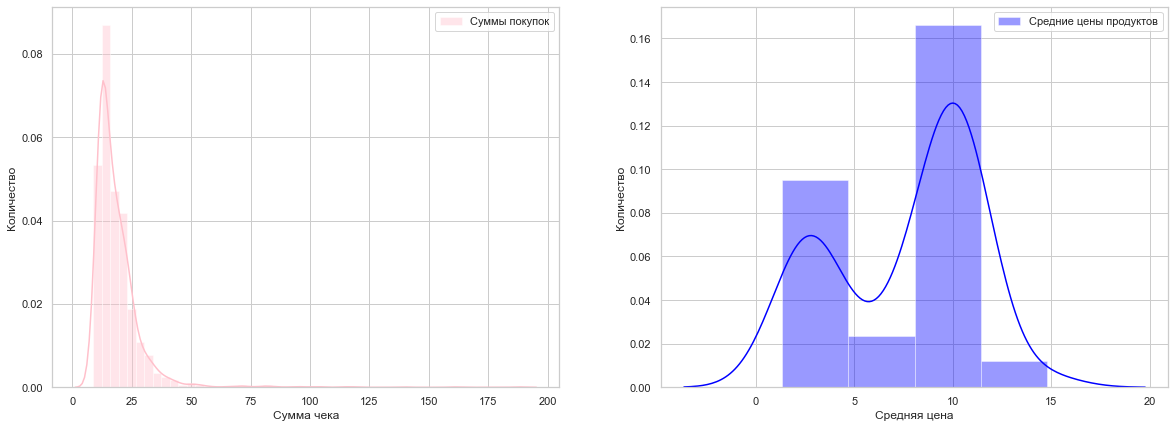

In [689]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.distplot(df.groupby('order_id')['price'].sum(), label='Суммы покупок', color='pink')
plt.xlabel('Сумма чека')
plt.ylabel('Количество')
plt.legend()
plt.subplot(1, 2, 2)
sns.distplot(df.groupby('item_name')['price'].mean(), label='Средние цены продуктов', color='blue');
plt.xlabel('Средняя цена')
plt.ylabel('Количество')
plt.legend()

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

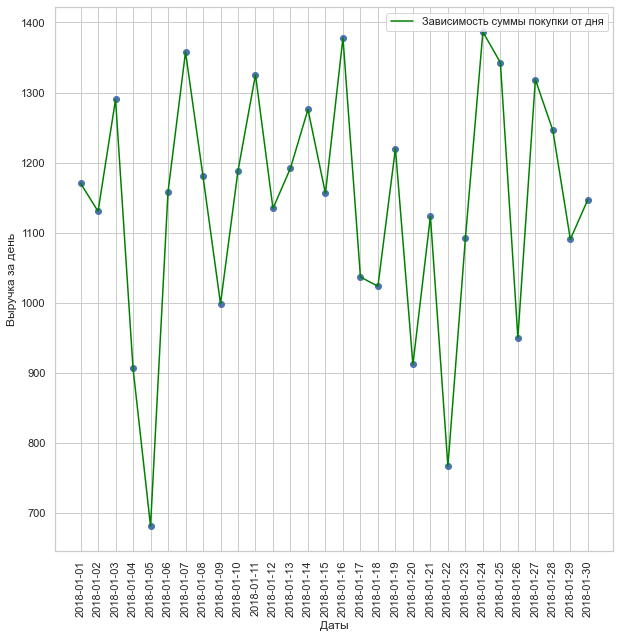

In [690]:
plt.figure(figsize=(10, 10))
series = df.groupby(['date', 'order_id'])['price'].sum().groupby('date').sum()
x = series.index
y = series.values
plt.scatter(x, y)
plt.plot(x, y, label='Зависимость суммы покупки от дня', color='green')
plt.xticks(x, rotation='vertical')
plt.xlabel('Даты')
plt.ylabel('Выручка за день')
plt.legend()

#### 3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


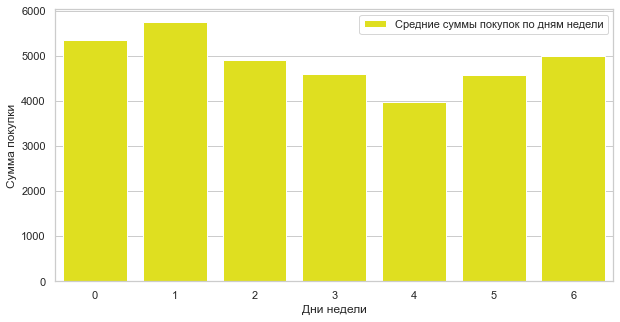

In [691]:
plt.figure(figsize=(10, 5))
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.weekday
bar_data = df.groupby('weekday')['price'].sum()
x = bar_data.index
y = bar_data.values
sns.barplot(x, y, label='Средние суммы покупок по дням недели', color='Yellow')
plt.xlabel('Дни недели')
plt.ylabel('Сумма покупки')
plt.legend()

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


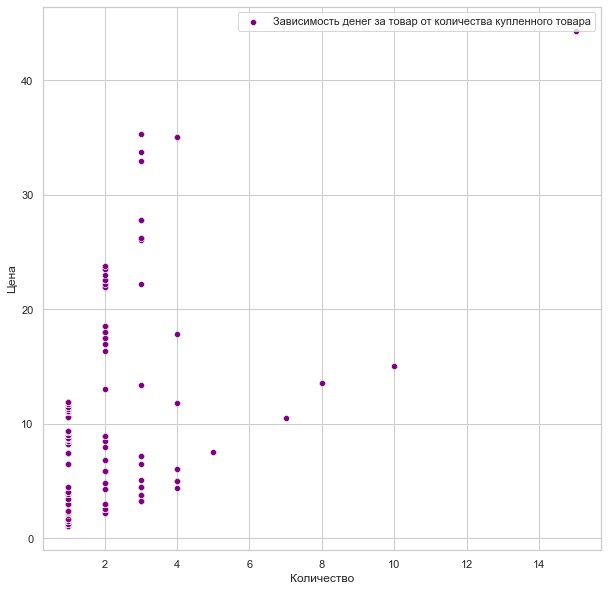

In [692]:
plt.figure(figsize=(10, 10))
x = df['quantity'].values
y = df['price'].values
sns.scatterplot(x, y, label='Зависимость денег за товар от количества купленного товара', color='Purple')
plt.xlabel('Количество')
plt.ylabel('Цена')
plt.legend()
plt.savefig('grafic.pdf')

Сохраните график в формате pdf (так он останется векторизованным).

In [693]:
#отдельно сохраняется пустой файл, см. выше

Кстати, существует надстройка над matplotlib под названием [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Иногда удобнее и красивее делать визуализации через неё. 